In [1]:
# Importing necessary libraries
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("forestfires.csv", delimiter=",")

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

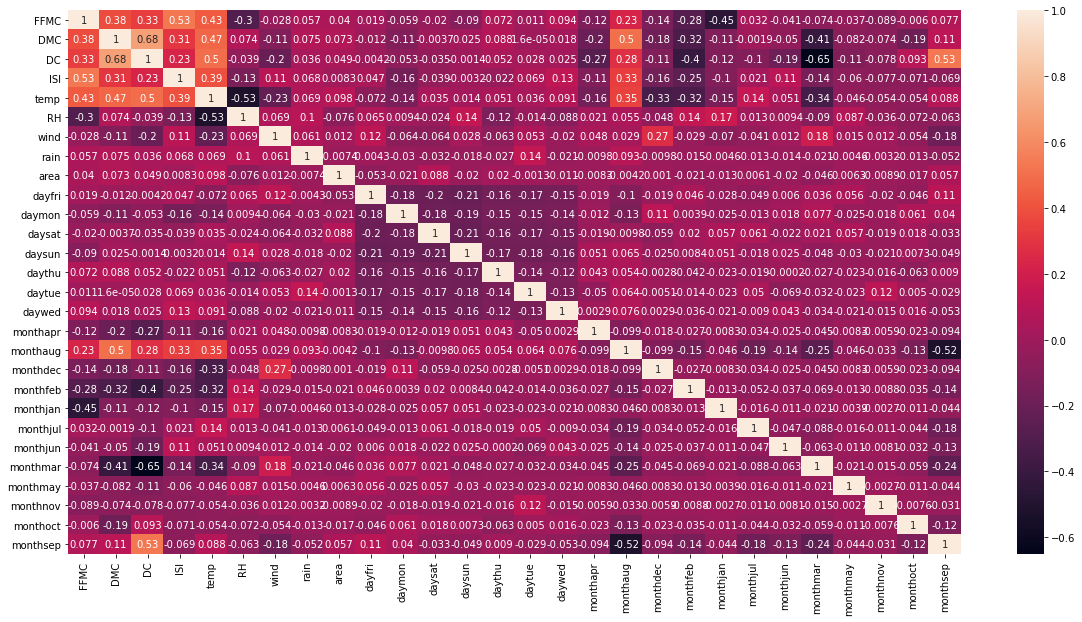

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [7]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
df=data.copy()

In [9]:
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [10]:
df=df.drop(columns=['month','day'], axis=1)

In [11]:
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [12]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [13]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [14]:
df.area.value_counts()

0.00     247
1.94       3
28.66      2
0.52       2
9.96       2
        ... 
2.21       1
7.36       1
0.24       1
6.84       1
35.88      1
Name: area, Length: 251, dtype: int64

In [15]:
df.rain.value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
1.4      1
6.4      1
1.0      1
Name: rain, dtype: int64

In [16]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['size_category']= label_encoder.fit_transform(df['size_category'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [18]:
X = df.drop('size_category', axis=1)
y = df['size_category']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [20]:
# create model
model = Sequential()
model.add(Dense(42, input_shape=(28,), activation = 'relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Fit the model
history=model.fit(X_train,y_train, validation_split=0.33, epochs=180, batch_size=10)

Epoch 1/180
28/28 [==============================] - 77s 1s/step - loss: 2.7477 - accuracy: 0.7065 - val_loss: 0.9240 - val_accuracy: 0.8321
Epoch 2/180
28/28 [==============================] - 0s 10ms/step - loss: 0.6870 - accuracy: 0.8080 - val_loss: 0.6387 - val_accuracy: 0.8613
Epoch 3/180
28/28 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.8478 - val_loss: 0.1996 - val_accuracy: 0.9197
Epoch 4/180
28/28 [==============================] - 0s 5ms/step - loss: 0.1970 - accuracy: 0.9312 - val_loss: 0.1214 - val_accuracy: 0.9489
Epoch 5/180
28/28 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9457 - val_loss: 0.1257 - val_accuracy: 0.9416
Epoch 6/180
28/28 [==============================] - 0s 4ms/step - loss: 0.2534 - accuracy: 0.8913 - val_loss: 0.1806 - val_accuracy: 0.9197
Epoch 7/180
28/28 [==============================] - 0s 6ms/step - loss: 0.1637 - accuracy: 0.9384 - val_loss: 0.1092 - val_accuracy: 0.9562
Epoch 8/180


In [23]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 0.9855
accuracy: 98.55%


In [24]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9904
accuracy: 99.04%


In [25]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
model.compile(loss="categorical_crossentropy",
              optimizer='rmsprop', metrics=["accuracy"])

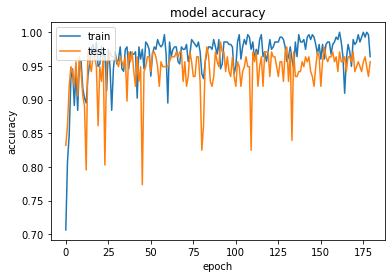

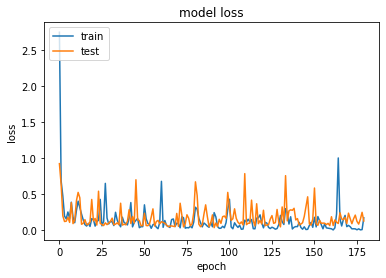

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion:

We have predicted the result with 98% accuracy here epoch=180

# Hyper parameter tuning

In [28]:
X1 = df.drop('size_category', axis=1)
y1 = df['size_category']

In [29]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X1)
X_standardized = a.transform(X1)

In [30]:
pd.DataFrame(X_standardized).describe()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


 Tuning of Hyperparameters :- Batch Size and Epochs

In [32]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [33]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [34]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

<ipython-input-34-8a1bb5609764>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   3.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ..................batch_size=10, epochs=50; total time=   5.4s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ..................batch_size=10, epochs=50; total time=   4.0s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ..................batch_size=10, epochs=50; total time=   3.9s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ..................batch_size=10, epochs=50; total time=   3.9s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ..................batch_size=10, epochs=50; total time=   5.2s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .................batch_size=10, epochs=100; total time=   7.0s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .................batch_size=10, epochs=100; total time=   7.2s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .................batch_size=10, epochs=100; total time=   7.4s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .................batch_size=10, epochs=100; total time=   7.1s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .................batch_size=10, epochs=100; total time=   6.9s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ..................batch_size=20, epochs=10; total time=   1.3s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ..................batch_size=20, epochs=10; total time=   1.2s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ..................batch_size=20, epochs=10; total time=   1.2s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ..................batch_size=20, epochs=10; total time=   1.2s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ..................batch_size=20, epochs=10; total time=   1.3s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ..................batch_size=20, epochs=50; total time=   3.1s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ..................batch_size=20, epochs=50; total time=   3.6s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ..................batch_size=20, epochs=50; total time=   2.4s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ..................batch_size=20, epochs=50; total time=   2.4s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ..................batch_size=20, epochs=50; total time=   2.6s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .................batch_size=20, epochs=100; total time=   4.1s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .................batch_size=20, epochs=100; total time=   4.1s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .................batch_size=20, epochs=100; total time=   4.1s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .................batch_size=20, epochs=100; total time=   4.1s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .................batch_size=20, epochs=100; total time=   4.1s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ..................batch_size=40, epochs=10; total time=   1.1s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ..................batch_size=40, epochs=10; total time=   1.1s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ..................batch_size=40, epochs=10; total time=   1.4s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ..................batch_size=40, epochs=10; total time=   1.1s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ..................batch_size=40, epochs=10; total time=   1.1s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.8s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.7s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.7s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.7s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.8s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.7s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.6s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.6s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   3.1s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.6s


In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9109036564826966, using {'batch_size': 10, 'epochs': 100}
0.8547983646392823,0.06984858708068305 with: {'batch_size': 10, 'epochs': 10}
0.9051344275474549,0.049755107845870124 with: {'batch_size': 10, 'epochs': 50}
0.9109036564826966,0.04639202742634024 with: {'batch_size': 10, 'epochs': 100}
0.8139656543731689,0.10503842898795183 with: {'batch_size': 20, 'epochs': 10}
0.8838498950004577,0.05630365582860939 with: {'batch_size': 20, 'epochs': 50}
0.897330105304718,0.05185092752087446 with: {'batch_size': 20, 'epochs': 100}
0.7560492873191833,0.06555992183078017 with: {'batch_size': 40, 'epochs': 10}
0.8799290537834168,0.050795497222170145 with: {'batch_size': 40, 'epochs': 50}
0.8915608763694763,0.05316208766884296 with: {'batch_size': 40, 'epochs': 100}


 Tuning of Hyperparameters:- Learning rate and Drop out rate

In [37]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

<ipython-input-37-abc2c594e5d5>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   1.9s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   1.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   1.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   1.3s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   1.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   1.4s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   1.3s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   1.4s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   1.7s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   1.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   1.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   1.5s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   1.4s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   1.4s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   1.4s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   3.6s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   1.5s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   1.4s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   1.5s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   1.9s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   1.2s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   1.2s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   1.1s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   1.1s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   1.1s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   1.1s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   1.2s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   1.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   1.2s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   1.2s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   1.6s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   1.3s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   1.2s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   1.3s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   1.2s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   1.2s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   1.2s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   1.2s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   1.2s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   1.1s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   1.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   1.6s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   1.2s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   1.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   1.2s


In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7888536334037781, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.734466016292572,0.15140339696325283 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7888536334037781,0.10337958169663229 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7410380959510803,0.11702467722415198 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7539021730422973,0.14898522144752427 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7175504088401794,0.10560382910276929 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.76945481300354,0.11250975764745674 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [40]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-40-8bf52302c8c2>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   7.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.2s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END .activation_function=softmax, init=normal; total time=  41.6s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END .activation_function=softmax, init=normal; total time=   1.5s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END .activation_function=softmax, init=normal; total time=   2.2s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END .activation_function=softmax, init=normal; total time=   1.6s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=   2.2s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.8s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.2s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.9s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.5s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.3s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END ...activation_function=relu, init=uniform; total time=   4.1s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END ...activation_function=relu, init=uniform; total time=   5.9s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END ...activation_function=relu, init=uniform; total time=   1.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time=   1.3s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time=   1.2s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.3s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.3s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.2s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.6s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.1s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END ......activation_function=relu, init=zero; total time=   1.3s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.7s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END ......activation_function=relu, init=zero; total time=   1.1s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=   1.1s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=   1.1s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.0s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.2s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.1s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.4s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.4s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.3s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.3s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.8s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=   1.4s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform; total time=   1.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=   1.5s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=   1.1s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   1.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   1.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   1.1s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   1.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   1.1s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   1.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.3s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.3s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.5s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.1s


In [41]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7519417405128479, using {'activation_function': 'linear', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.43058252334594727,0.2686514950632128 with: {'activation_function': 'softmax', 'init': 'normal'}
0.6305825233459472,0.24482772813004766 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7442120909690857,0.12511748015763965 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7384615421295166,0.11111904628923971 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7423076748847961,0.11853297569023573 with: {'activat

 Tuning of Hyperparameter :-Number of Neurons in activation layer

In [43]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-43-3f74ef20bad2>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  41.1s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  13.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   9.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   9.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=  12.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  12.9s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   8.4s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   6.9s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......................neuron1=4, neuron2=4; total time=10.4min
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=  22.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   4.6s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  23.7s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=  14.4s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   5.6s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   3.2s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   3.3s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   4.7s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   4.5s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time= 2.3min
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.2s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.7s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.8s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.9s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.4s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.1s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   1.8s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.1s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   3.6s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.6s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.4s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.2s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.2s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.4s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.7s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.3s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.3s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.2s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.2s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.1s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.2s


In [49]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7520351052284241, using {'neuron1': 16, 'neuron2': 8}
0.7364637851715088,0.13268866019955503 with: {'neuron1': 4, 'neuron2': 2}
0.7403472661972046,0.12648372666695779 with: {'neuron1': 4, 'neuron2': 4}
0.7480582475662232,0.13661750505310216 with: {'neuron1': 4, 'neuron2': 8}
0.7403472661972046,0.12648372666695779 with: {'neuron1': 8, 'neuron2': 2}
0.7307132124900818,0.11310132509742106 with: {'neuron1': 8, 'neuron2': 4}
0.7462285280227661,0.1055780321321956 with: {'neuron1': 8, 'neuron2': 8}
0.75005601644516,0.11683313271547337 with: {'neuron1': 16, 'neuron2': 2}
0.7423450469970703,0.10810528902110296 with: {'neuron1': 16, 'neuron2': 4}
0.7520351052284241,0.10483888223784278 with: {'neuron1': 16, 'neuron2': 8}


Training model with optimum values of Hyperparameters

In [44]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(X_standardized,y1)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y1,y_predict))

<ipython-input-44-0500381b7ebd>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.7775628626692457


# Hyperparameters all at once

In [45]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y1)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

<ipython-input-45-0620f9c60ee8>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.1s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.3s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.3s
[CV 4/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.4s
[CV 1/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.8s
[CV 3/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 4/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.8s
[CV 5/5; 2/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.5s
[CV 1/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.5s
[CV 2/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.7s
[CV 3/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 3/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.5s
[CV 2/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.6s
[CV 3/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.5s
[CV 4/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.6s
[CV 5/5; 4/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.7s
[CV 1/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 3/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.7s
[CV 4/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.4s
[CV 5/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.8s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 5/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.9s
[CV 1/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.6s
[CV 4/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.6s
[CV 5/5; 7/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.7s
[CV 1/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.8s
[CV 3/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.4s
[CV 4/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.2s
[CV 5/5; 8/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.6s
[CV 1/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.7s
[CV 2/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.6s
[CV 3/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.7s
[CV 4/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.8s
[CV 5/5; 9/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.7s
[CV 1/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 2/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.5s
[CV 3/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 4/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.4s
[CV 5/5; 10/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.4s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.7s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.7s
[CV 5/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.6s
[CV 1/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 2/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.4s
[CV 3/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.8s
[CV 4/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.4s
[CV 5/5; 12/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 1/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.1s
[CV 2/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.6s
[CV 3/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.5s
[CV 4/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.6s
[CV 5/5; 13/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 13/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.6s
[CV 1/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.8s
[CV 3/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.6s
[CV 4/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 14/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 14/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.3s
[CV 2/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.6s
[CV 3/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.0s
[CV 4/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.5s
[CV 5/5; 15/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 15/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.5s
[CV 1/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.5s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.5s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.5s
[CV 1/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 2/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 3/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.6s
[CV 4/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.3s
[CV 5/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 17/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 1/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.5s
[CV 2/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.6s
[CV 3/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.5s
[CV 4/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.5s
[CV 5/5; 18/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 18/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.7s
[CV 1/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.8s
[CV 2/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.2s
[CV 4/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.4s
[CV 5/5; 19/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 19/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.4s
[CV 1/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.5s
[CV 2/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.7s
[CV 3/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.5s
[CV 4/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.6s
[CV 5/5; 20/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 20/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 1/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.5s
[CV 2/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.7s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.5s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.6s
[CV 5/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.2s
[CV 2/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 3/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.4s
[CV 4/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 5/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.8s
[CV 1/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 2/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 3/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 4/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 5/5; 23/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 23/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 1/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 2/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.3s
[CV 4/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.6s
[CV 5/5; 24/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 24/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 2/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.7s
[CV 3/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.6s
[CV 4/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 25/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 25/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.7s
[CV 1/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 2/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 5/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.5s
[CV 1/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.8s
[CV 2/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.9s
[CV 3/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.2s
[CV 4/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 1/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 4/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 28/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 28/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.4s
[CV 1/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 3/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.0s
[CV 4/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.3s
[CV 5/5; 29/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 29/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.2s
[CV 1/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.1s
[CV 2/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.8s
[CV 3/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 30/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 30/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 1/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.7s
[CV 2/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.8s
[CV 3/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   6.5s
[CV 4/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   7.1s
[CV 5/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   5.3s
[CV 1/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.3s
[CV 2/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 3/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 4/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.8s
[CV 5/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 1/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 2/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.6s
[CV 3/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.2s
[CV 4/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.0s
[CV 5/5; 33/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 33/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 1/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.2s
[CV 2/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.2s
[CV 4/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.3s
[CV 5/5; 34/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 34/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.3s
[CV 1/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.5s
[CV 2/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.3s
[CV 3/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   5.5s
[CV 4/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.1s
[CV 5/5; 35/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 35/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.8s
[CV 1/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   7.9s
[CV 2/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   6.0s
[CV 3/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 4/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   5.4s
[CV 5/5; 36/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.7s
[CV 1/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.3s
[CV 3/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.3s
[CV 4/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.4s
[CV 5/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.5s
[CV 1/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 2/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.1s
[CV 3/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.7s
[CV 4/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.1s
[CV 5/5; 38/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 38/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=  13.1s
[CV 1/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   6.3s
[CV 2/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.6s
[CV 3/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.3s
[CV 4/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 39/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 39/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.5s
[CV 1/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.6s
[CV 4/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.7s
[CV 5/5; 40/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 40/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.8s
[CV 1/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.7s
[CV 2/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 3/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.1s
[CV 4/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 41/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 41/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4


C:\Users\shashank\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 